# Making Maps, v2


What goes into making a map?

* __Geometry__: Data structures to represent points, lines, and polygons, along with functions to manipulate them. Most packages are based on the open-source GEOS library.
* __Projections__: Functions to convert between different map projections. Most packages are based on the open-source PROJ.4 library.
* __Formats__: Functions to read/write shapefiles, geojson, and other formats. Most packages are based on the open-source GDAL/OGR library.
* __Display__: Functions to draw the map.
* __Searches__: Functions to search in various ways (geocode, reverse geocode, and so on).

The organization of Python's GIS (geographic information system) packages can be confusing, and some of the packages are difficult to install.

## References

* Lawhead, J. _Learning Geospatial Analysis with Python_.
* [Urban Informatics and Visualiation](https://github.com/waddell/urban-informatics-and-visualization), a course a UC Berkeley

* [GeoPandas](http://geopandas.org/)
    + [Automating GIS Processes](https://automating-gis-processes.github.io/), an open course from University of Helsinki
    
    
* [Geoplot](https://residentmario.github.io/geoplot/)

* [Basemap](http://matplotlib.org/basemap/)
    + [Basemap Tutorial](https://basemaptutorial.readthedocs.io/en/latest/)
    + [Mapping Global Earthquake Activity](http://introtopython.org/visualization_earthquakes.html)
    + [Creating Attractive and Informative Map Visualisations in Python with Basemap](http://www.datadependence.com/2016/06/creating-map-visualisations-in-python/)
    
    
* [CartoPy](http://scitools.org.uk/cartopy/docs/latest/)

## Setup: Get the Packages

In [1]:
%matplotlib inline

import matplotlib.pyplot as plt
import pandas as pd

import geopandas as gpd         # conda install -c conda-forge geopandas
import osmnx as ox              # conda install -c conda-forge osmnx
import shapely.geometry as geom # conda install -c conda-forge shapely

Trouble installing the packages?

* For Windows, try these [manual installation instructions][win-install].
* For OS X, first try:
    1. `git clone https://github.com/geopandas/geopandas.git`
    2. `cd geopandas`
    3. `pip install .`
* If above doesn't work for OS X, try these steps:
    1. Get [Homebrew][], a package manager for OS X.
    2. In the terminal, run `brew install geos`
    3. Run `brew install gdal`
    4. Run `brew install spatialindex`
    5. Now install the Python packages with `pip3` (you might have to `--force-reinstall`).

[win-install]: http://geoffboeing.com/2014/09/using-geopandas-windows/
[Homebrew]: https://brew.sh/

## GeoPandas

The purpose of GeoPandas is to make it easy to work with geospatial data.

Geospatial data is made up of points, lines, and polygons. These are called _geometries_. In GeoPandas, each geometry is represented by a row in a data frame.

Just like there are many formats for storing tabular data (CSV, Excel, Feather, ...), there are [many formats][gis-formats] for storing geospatial data. A few of these are:

* Esri Shapefile
* GeoJSON
* KML (Keyhole Markup Language)

The same function is used to read any of these. For example, to read the US Census Bureau's [counties shapefile][counties]:

[gis-formats]: https://en.wikipedia.org/wiki/GIS_file_formats
[counties]: https://www.census.gov/geo/maps-data/data/cbf/cbf_counties.html

In [2]:
counties = gpd.read_file("shapefiles/counties/cb_2016_us_county_500k.shp")

counties.head()

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
0,19,107,00465242,0500000US19107,19107,Keokuk,06,1500067253,1929323,"POLYGON ((-92.41199499999999 41.509548, -92.35..."
1,19,189,00465283,0500000US19189,19189,Winnebago,06,1037261946,3182052,"POLYGON ((-93.97076 43.499605, -93.88843009910..."
2,20,093,00485011,0500000US20093,20093,Kearny,06,2254696689,1133601,"POLYGON ((-101.54192 37.914575, -101.541863 37..."
3,20,123,00485026,0500000US20123,20123,Mitchell,06,1817632928,44979981,"POLYGON ((-98.49006799999999 39.241666, -98.49..."
4,20,187,00485055,0500000US20187,20187,Stanton,06,1762104518,178555,"POLYGON ((-102.041899 37.541186, -102.041894 3..."


Behind the scenes, GeoPandas uses the `fiona` package (based on the [GDAL/OGR library][gdal]) to read geospatial data. You can see which formats are supported by looking at the supported drivers:

[gdal]: https://en.wikipedia.org/wiki/GDAL

In [3]:
import fiona

fiona.supported_drivers

{'ARCGEN': 'r',
 'AeronavFAA': 'r',
 'BNA': 'raw',
 'DGN': 'raw',
 'DXF': 'raw',
 'ESRI Shapefile': 'raw',
 'GPSTrackMaker': 'raw',
 'GPX': 'raw',
 'GeoJSON': 'rw',
 'Idrisi': 'r',
 'MapInfo File': 'raw',
 'OpenFileGDB': 'r',
 'PCIDSK': 'r',
 'SEGY': 'r',
 'SUA': 'r'}

We can subset a GeoPandas data frame just like a Pandas data frame.

In [4]:
cali = counties[counties.STATEFP == "06"]
cali.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
44,06,007,01675842,0500000US06007,06007,Butte,06,4238423343,105325812,"POLYGON ((-122.068744 39.842222, -122.066943 3..."
45,06,009,01675885,0500000US06009,06009,Calaveras,06,2641820834,43806026,"POLYGON ((-120.993595 38.225582, -120.991608 3..."
46,06,011,01675902,0500000US06011,06011,Colusa,06,2980372757,14581043,"POLYGON ((-122.78509 39.38297499999999, -122.7..."


GeoPandas data frames always have a `geometry` column. This column is where the coordinates for the geometries are stored.

In the counties shapefile, the county boundaries are polygons. We can take a look by plotting them:

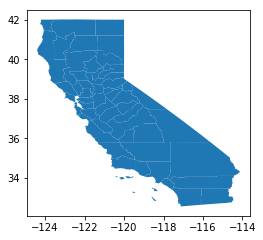

In [5]:
cali.plot(figsize = (4, 4))

This is a matplotlib plot, similar to when we use `.plot()` on a Pandas data frame. So it can be customized using matplotlib syntax:

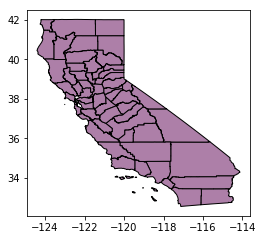

In [6]:
cali.plot(figsize = (4, 4), edgecolor = "black", color = "#ad7fa8")

Behind the scenes, GeoPandas uses the `shapely` package (based on the [GEOS library][geos]) to represent and manipulate geometries.

[GEOS]: https://en.wikipedia.org/wiki/JTS_Topology_Suite#GEOS_Library

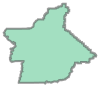

In [7]:
cali.geometry.iloc[0]

Sometimes we'll need to create our own geometries:

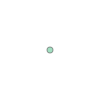

In [8]:
geom.Point(10, 10)

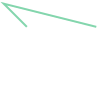

In [9]:
geom.LineString([(5, 10), (0, 15), (20, 10)])

## Creating GeoPandas Data Frames

A dataset about recent restaurant inspections in Yolo County is available [here](http://anson.ucdavis.edu/~nulle/yolo_food.feather) (if you think this is an interesting dataset, a SQLite database with more detail is [here](http://anson.ucdavis.edu/~nulle/yolo_food.sqlite)).

We can use this dataset to make a map of restaurants.

In [10]:
food = pd.read_feather("data/yolo_food.feather")
food.head()

,Address,CityStateZip,FacilityId,FacilityName,LastScore,attachmentId,facility_index,programId,lat,lng,violation_count
0,507 L ST,DAVIS CA 95616,FA0001050,AGGIE LIQUOR,100.0,None,0,PR0000625,38.548803,-121.734964,1.0
1,1638 W CAPITOL AVE A,WEST SACRAMENTO CA 95691,FA0001104,ARIANA FOOD MARKET,100.0,47e30d7a-1ac8-4f4e-9698-a8470105abf2,1,PR0001009,38.580577,-121.529824,40.0
2,940 SACRAMENTO AVE,WEST SACRAMENTO CA 95605,FA0001394,ARTEAGA'S SUPERMARKET INC,100.0,97e57282-4d8f-489c-b824-a7f901131b7d,2,PR0000916,38.590215,-121.525425,36.0
3,966 SACRAMENTO Ave,WEST SACRAMENTO CA 95691,FA0001628,AY! JALISCO TAQUERIA #1,100.0,None,3,PR0022107,38.589293,-121.524593,15.0
4,220 3RD ST,DAVIS CA 95616,FA0001973,ALI BABA RESTAURANT,100.0,21baede1-18be-40df-a479-a86b00c2551f,4,PR0000674,38.543602,-121.746331,34.0


The first step is to convert to a GeoPandas data frame.

Each row in the Pandas data frame is a restaurant, so each row in the GeoPandas data frame will be a point.

Let's make a shapely Point for each row:

In [11]:
lnglat = [geom.Point(x) for x in zip(food.lng, food.lat)]

Now we can make a GeoPandas data frame with these points as the geometries:

In [12]:
food = gpd.GeoDataFrame(food, geometry = lnglat)
food.head()

,Address,CityStateZip,FacilityId,FacilityName,LastScore,attachmentId,facility_index,programId,lat,lng,violation_count,geometry
0,507 L ST,DAVIS CA 95616,FA0001050,AGGIE LIQUOR,100.0,None,0,PR0000625,38.548803,-121.734964,1.0,POINT (-121.7349636 38.54880290000001)
1,1638 W CAPITOL AVE A,WEST SACRAMENTO CA 95691,FA0001104,ARIANA FOOD MARKET,100.0,47e30d7a-1ac8-4f4e-9698-a8470105abf2,1,PR0001009,38.580577,-121.529824,40.0,POINT (-121.5298241 38.5805771)
2,940 SACRAMENTO AVE,WEST SACRAMENTO CA 95605,FA0001394,ARTEAGA'S SUPERMARKET INC,100.0,97e57282-4d8f-489c-b824-a7f901131b7d,2,PR0000916,38.590215,-121.525425,36.0,POINT (-121.525425 38.590215)
3,966 SACRAMENTO Ave,WEST SACRAMENTO CA 95691,FA0001628,AY! JALISCO TAQUERIA #1,100.0,None,3,PR0022107,38.589293,-121.524593,15.0,POINT (-121.5245931 38.5892931)
4,220 3RD ST,DAVIS CA 95616,FA0001973,ALI BABA RESTAURANT,100.0,21baede1-18be-40df-a479-a86b00c2551f,4,PR0000674,38.543602,-121.746331,34.0,POINT (-121.7463309 38.543602)


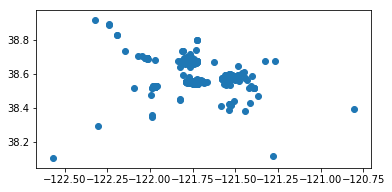

In [13]:
food.plot()

Without boundaries for context, it's hard to make sense of the points.

Let's combine the restaurant inspections with the counties data:

In [14]:
# Get Yolo and surrounding counties.
keep = ["Yolo", "Lake", "Colusa", "Sutter", "Sacramento", "Solano", "Napa"]
yolo = cali[cali.NAME.isin(keep)]

(38.2, 39)

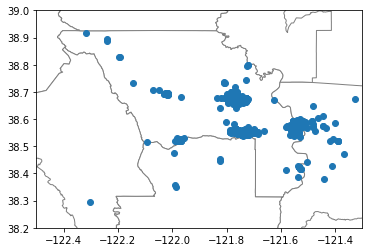

In [15]:
# Make the plot.
ax = yolo.plot(color = "white", edgecolor = "gray")
food.plot(ax = ax)

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])

## Adding County Names

Let's label the counties with their names.

We have all the information we need in the counties data frame.

In [16]:
yolo.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry
46,06,011,01675902,0500000US06011,06011,Colusa,06,2980372757,14581043,"POLYGON ((-122.78509 39.38297499999999, -122.7..."
50,06,033,00277281,0500000US06033,06033,Lake,06,3254288286,188912510,"POLYGON ((-123.094212 39.095294, -123.085012 3..."
56,06,113,00277321,0500000US06113,06113,Yolo,06,2628256658,22688574,"POLYGON ((-122.421488 38.90233, -122.421904 38..."


We can get a point near the middle of a polygon with `.representative_point()`:

In [17]:
yolo.geometry.iloc[0].representative_point().coords[0]

(-122.2066948418101, 39.168595999999994)

So we need to get a representative point for each polygon, and then use that to add an annotation:

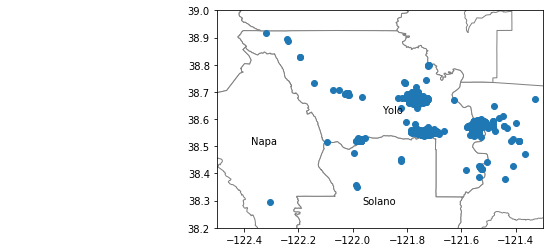

In [18]:
# Make the plot.
ax = yolo.plot(color = "white", edgecolor = "gray")
food.plot(ax = ax)

# Set x and y limits to adjust the "zoom".
ax.set_xlim([-122.5, -121.3])
ax.set_ylim([38.2, 39])

# Given a row, this function gets a point and plots the county name at that point.
def add_label(row):
    coords = row.geometry.representative_point().coords[0]
    ax.annotate(row.NAME, xy = coords, horizontalalignment = "center")
    
# Call add_label() on each row.
yolo.apply(add_label, axis = 1)

# Don't print out the result from the .apply().
plt.show()

## Adding Streets

The `osmnx` package can download boundaries and streets from [OpenStreetMap](https://www.openstreetmap.org/).

There are [many ways](http://geoffboeing.com/2016/11/osmnx-python-street-networks/) to specify what you want, but the easiest is to use a place name:

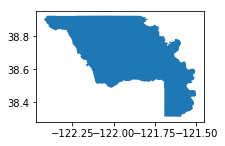

In [19]:
# Get a GeoPandas data frame for Yolo County.
yolo_county = ox.gdf_from_place("Yolo County, California")
yolo_county.plot(figsize = (3, 3))

Since `osmnx` downloads the shapefile, be polite (the same as when using the `requests` package).

Because it's a GeoPandas data frame, you can save a downloaded shapefile to use later:

In [20]:
yolo_county.to_file("yolo.geojson", "GeoJSON")

You can also get street networks:

In [21]:
davis_streets = ox.graph_from_place("Davis, California", network_type = "drive")

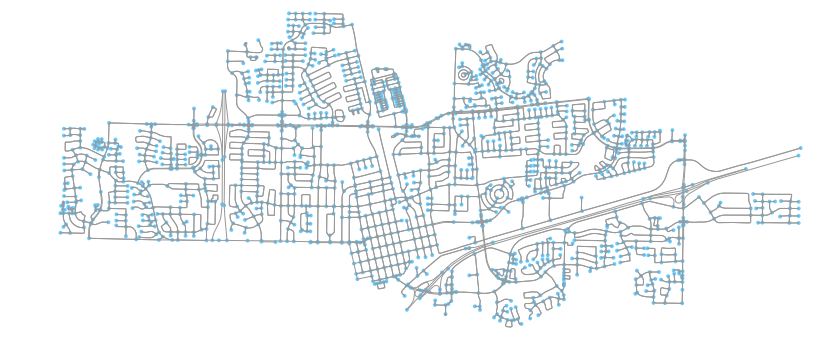

(<matplotlib.figure.Figure at 0x7f97bb3a7160>,
 <matplotlib.axes._subplots.AxesSubplot at 0x7f97bb3a7be0>)

In [22]:
ox.plot_graph(davis_streets)

Street networks are not GeoPandas data frames, but you can convert them to two data frames:

In [23]:
nodes, edges = ox.graph_to_gdfs(davis_streets)

The edges are the part you want if you're going to use the streets in a plot:

(38.53, 38.58)

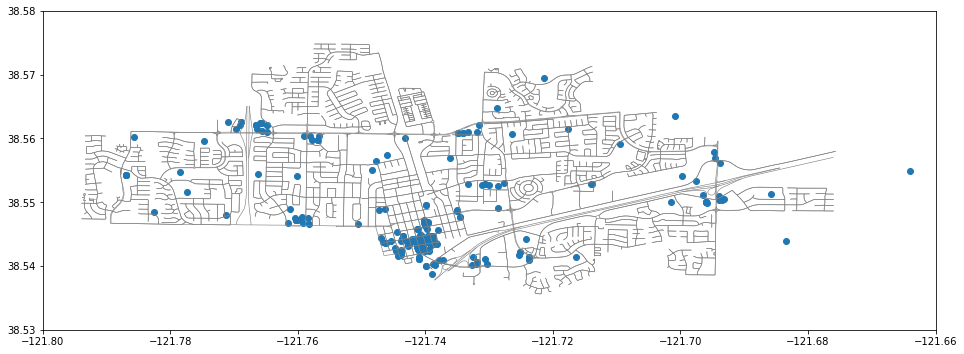

In [24]:
ax = edges.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
food.plot(ax = ax)

ax.set_xlim([-121.8, -121.66])
ax.set_ylim([38.53, 38.58])

## Projections and Coordinate Reference Systems (CRS)

The Davis street network looks different in the two maps above because they have different projections.

The earth is a 3-dimensional sphere, but we're projecting it onto a flat 2-dimensional screen. This means parts of the map will always be distorted.

There are [many different projections](https://en.wikipedia.org/wiki/List_of_map_projections). Common kinds of projections are:

* __Equal-area__: accurate area
* __Equidistant__: accurate distance
* __Conformal__: accurate shape
* __Azimuthal__: accurate direction between points
* __Compromise__: compromise between area, distance, shape, and direction to improve aesthetics

We can check the projection of a GeoPandas data frame with the `.crs` attribute:

In [25]:
edges.crs

{'init': 'epsg:4326'}

The [EPSG 4326][epsg4326] projection is usually used for world maps.

For city maps, a popular projection is [Universal Transverse Mercator][utm] (UTM), a conformal projection. UTM is acually several projections, organized by time zone; we're in zone 10.

Let's change the projection. To do this, we need to use a projection string:

[epsg4326]: https://en.wikipedia.org/wiki/World_Geodetic_System
[utm]: https://en.wikipedia.org/wiki/Universal_Transverse_Mercator_coordinate_system

In [26]:
# Projection string from http://geopandas.org/projections.html
utm_crs = '+proj=utm +zone=10 +ellps=GRS80 +datum=NAD83 +units=m +no_defs '
edges_proj = edges.to_crs(utm_crs)
yolo_proj = yolo.to_crs(utm_crs)

Behind the scenes, GeoPandas uses the `pyproj` package (based on the [PROJ.4 library][proj4]) to re-project geometries.

[proj4]: https://en.wikipedia.org/wiki/PROJ.4

The restaurant dataset didn't come with a projection, but latitude and longitude usually means EPSG 4326. So we can set the coordinates to EPSG 4326, and then re-project:

In [27]:
# Projection string from http://geopandas.org/projections.html
food.crs = "+init=epsg:4326"
food_proj = food.to_crs(utm_crs)

(4265000, 4272000)

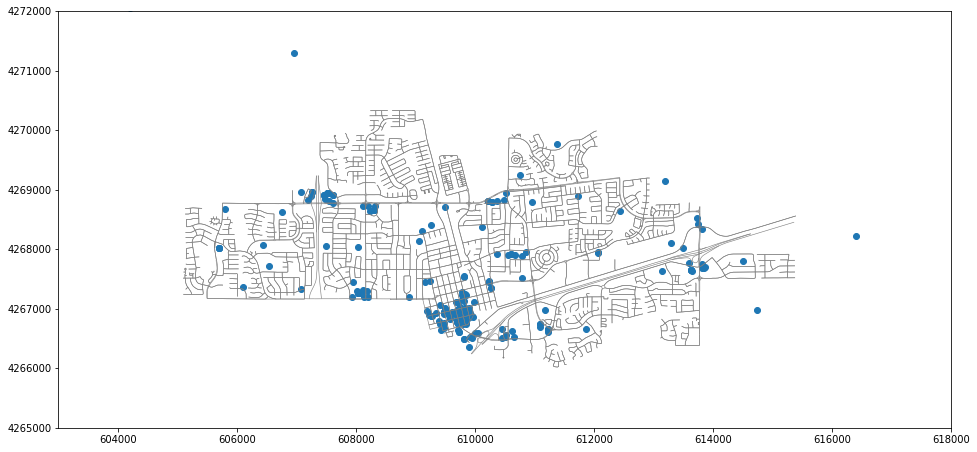

In [28]:
ax = edges_proj.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
food_proj.plot(ax = ax)

ax.set_xlim([603_000, 618_000])
ax.set_ylim([4265_000, 4272_000])

## Color-coding Points

We can color-code the points by number of violations to see if restaurants with lots of violations tend to cluster together.

To do this, we need to set the `column` parameter in our plot:

(4265000, 4271000)

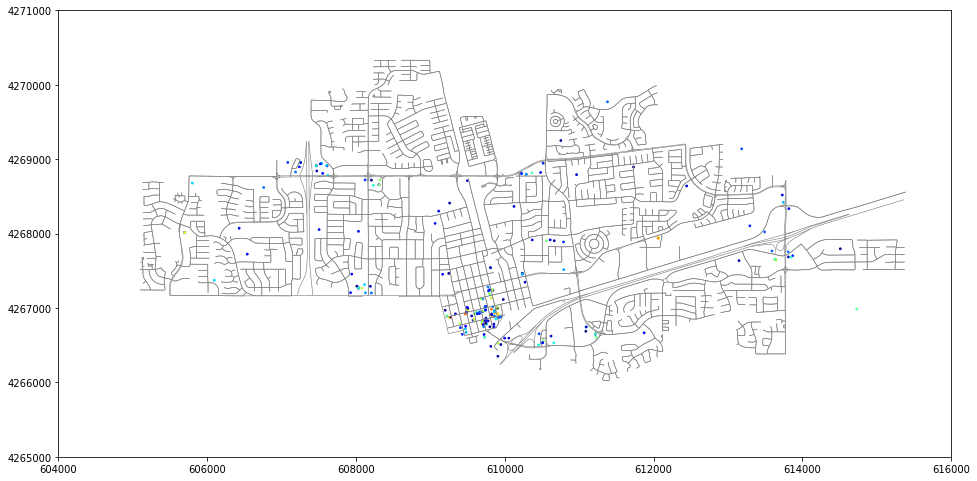

In [53]:
ax = edges_proj.plot(color = "gray", linewidth = 0.6, figsize = (16, 16))
food_proj.plot(ax = ax, column = "violation_count", cmap = "jet", markersize = 3)

ax.set_xlim([604_000, 616_000])
ax.set_ylim([4265_000, 4271_000])

## Joining Points and Polygons

A few of the restaurants appear to be outside of Yolo. This is because the latitudes and longitudes were computed or _geocoded_ from the addresses using Google Maps. Google Maps may have gotten some of them wrong.

We can use GeoPandas to match points to polygons, so we can find all the points that are not in Yolo.

The idea is similar to a join, but uses geospatial relationships instead of equality:

In [30]:
# Inner join by checking whether point is "within" polygon
joined = gpd.sjoin(food, yolo, how = "inner", op = "within")

The CRS should match for the join to work correctly. They do in this example, but GeoPandas gets confused because one is a string and one is a dict:

In [31]:
print(food.crs)
print(yolo.crs)

+init=epsg:4326
{'init': 'epsg:4269'}


Now we can see which points are incorrect:

In [32]:
joined[joined.NAME != "Yolo"].head(3)

,Address,CityStateZip,FacilityId,FacilityName,LastScore,attachmentId,facility_index,programId,lat,lng,...,index_right,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER
11,8334 OLIVE SCHOOL RD,WINTERS CA 95694,FA0006503,AL & TOMI'S SHAVED ICE,100.0,None,11,PR0033598,38.474982,-121.994667,...,2355,06,095,00277312,0500000US06095,06095,Solano,06,2128380148,218647027
18,160 W A ST,DIXON CA 95620,FA0012414,ANDERSON FAMILY CATERING BBQ,100.0,None,18,PR0043173,38.445575,-121.823413,...,2355,06,095,00277312,0500000US06095,06095,Solano,06,2128380148,218647027
236,819 DAVIS ST A STE,VACAVILLE CA 95687,FA0017743,ERICA MARIE'S CATERING,100.0,992327c7-5a9c-46f3-a342-a88000dfa240,236,PR0057103,38.349111,-121.985521,...,2355,06,095,00277312,0500000US06095,06095,Solano,06,2128380148,218647027


## Chloropleth Maps

Joining geospatial data is also useful for making [chloropleth](http://geopandas.org/mapping.html#chloropleth-maps) maps.

Let's make a chloropleth map that shows the number of restaurants in each county.

The polygons in the chlorpleth are shaded according to a column in the data frame, so we just need to make a column of restaurant counts.

In [33]:
joined = gpd.sjoin(yolo, food, how = "left", op = "contains")

In [34]:
joined.head(3)

,STATEFP,COUNTYFP,COUNTYNS,AFFGEOID,GEOID,NAME,LSAD,ALAND,AWATER,geometry,...,CityStateZip,FacilityId,FacilityName,LastScore,attachmentId,facility_index,programId,lat,lng,violation_count
46,06,011,01675902,0500000US06011,06011,Colusa,06,2980372757,14581043,"POLYGON ((-122.78509 39.38297499999999, -122.7...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50,06,033,00277281,0500000US06033,06033,Lake,06,3254288286,188912510,"POLYGON ((-123.094212 39.095294, -123.085012 3...",...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
56,06,113,00277321,0500000US06113,06113,Yolo,06,2628256658,22688574,"POLYGON ((-122.421488 38.90233, -122.421904 38...",...,CLARKSBURG CA 95612,FA0002250,HOLLAND MARKET,100.0,None,332.0,PR0022171,38.416306,-121.525923,9.0


In [35]:
# Count up the number of restaurants in each county.
per_county = joined.groupby("COUNTYFP").agg({
    "COUNTYFP": "count",
    "geometry": "first"
})

# Fix the row/column names.
per_county.reset_index(drop = True, inplace = True)
per_county.rename(columns = {"COUNTYFP": "count"}, inplace = True)

The group-by gave us a regular Pandas data frame, so we need to make it into a GeoPandas data frame again in order to plot.

In [36]:
per_county = gpd.GeoDataFrame(per_county)

Now we can make the plot:

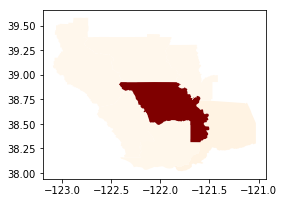

In [37]:
per_county.plot(column = "count", cmap = "OrRd", figsize = (4, 4))

## Geoplot

The goal of the `geoplot` package is to help with making common kinds of maps, the same way `seaborn` helps with making common kinds of statistical visualizations.

The package is still very new, so it might have lots of bugs. If you want to try it out, there's a [tutorial][geoplot].

[geoplot]: https://nbviewer.jupyter.org/github/ResidentMario/geoplot/blob/master/notebooks/tutorials/Quickstart.ipynb

## Basemap

The `basemap` package is the matplotlib of mapping: powerful but complicated. Unlike matplotlib, basemap is rarely updated (so there might be bugs).

__Nick recommends using GeoPandas instead!__

We'll use the [NOAA Significant Earthquake Database](https://www.ngdc.noaa.gov/nndc/struts/form?t=101650&s=1&d=1) in the examples below.

In [38]:
df = pd.read_table("data/signif.txt")
df.columns = df.columns.str.lower()
latlon = ["latitude", "longitude"]
df[latlon] = df[latlon].apply(lambda x: pd.to_numeric(x.str.strip()))
df.head()

,i_d,flag_tsunami,year,month,day,hour,minute,second,focal_depth,eq_primary,...,total_missing,total_missing_description,total_injuries,total_injuries_description,total_damage_millions_dollars,total_damage_description,total_houses_destroyed,total_houses_destroyed_description,total_houses_damaged,total_houses_damaged_description
0,1,NaN,-2150,NaN,NaN,NaN,NaN,,NaN,7.3,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,3,NaN,-2000,NaN,NaN,NaN,NaN,NaN,18.0,7.1,...,NaN,NaN,NaN,NaN,NaN,1.0,NaN,1.0,NaN,NaN
2,2,Tsu,-2000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,5877,Tsu,-1610,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,3.0,NaN,NaN,NaN,NaN
4,8,NaN,-1566,NaN,NaN,NaN,NaN,,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [39]:
df.dtypes

i_d                                     int64
flag_tsunami                           object
year                                    int64
month                                 float64
day                                   float64
hour                                  float64
minute                                float64
second                                 object
focal_depth                           float64
eq_primary                            float64
eq_mag_mw                             float64
eq_mag_ms                             float64
eq_mag_mb                             float64
eq_mag_ml                             float64
eq_mag_mfa                            float64
eq_mag_unk                            float64
intensity                             float64
country                                object
state                                  object
location_name                          object
latitude                              float64
longitude                         

Plotting Davis on a map:

/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


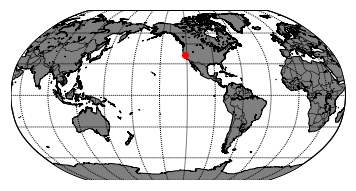

In [40]:
from mpl_toolkits.basemap import Basemap
import numpy as np

my_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)

my_map.drawcoastlines()
my_map.drawcountries()
my_map.fillcontinents(color="gray")
my_map.drawmapboundary()
my_map.drawmeridians(np.arange(0, 360, 30))
my_map.drawparallels(np.arange(-90, 90, 30))

x, y = my_map(-121.70, 38.54) # Davis, CA
my_map.plot(x, y, "ro")
my_map

Adding the earthquakes to the map:

/usr/lib/python3.6/site-packages/mpl_toolkits/basemap/__init__.py:1707: MatplotlibDeprecationWarning: The axesPatch function was deprecated in version 2.1. Use Axes.patch instead.
  if limb is not ax.axesPatch:


TypeError: fillcontinents() got an unexpected keyword argument 'bcolor'

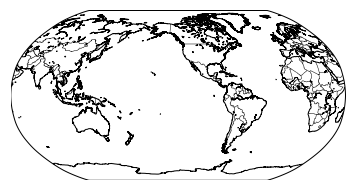

In [41]:
quake_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)
 
quake_map.drawcoastlines()
quake_map.drawcountries()
quake_map.fillcontinents(bcolor="gray")
quake_map.drawmapboundary()
quake_map.drawmeridians(np.arange(0, 360, 30))
quake_map.drawparallels(np.arange(-90, 90, 30))

x, y = quake_map(df.longitude.values, df.latitude.values)
quake_map.plot(x, y, "ro", markersize = 1)

With more work, we can color code the earthquakes by magnitude:

In [ ]:
df.eq_primary.describe()

In [ ]:
quake_map = Basemap(projection='robin', lat_0=0, lon_0=-130, resolution='l', area_thresh=1000)
 
quake_map.drawcoastlines()
quake_map.drawcountries()
quake_map.fillcontinents(color="gray")
quake_map.drawmapboundary()
quake_map.drawmeridians(np.arange(0, 360, 30))
quake_map.drawparallels(np.arange(-90, 90, 30))

for lon, lat, mag in zip(df.longitude, df.latitude, df.eq_primary):
    x, y = quake_map(lon, lat)
    color = "r"
    if mag <= 5.7:
        color = "g"
    elif mag <= 6.5:
        color = "y"
    quake_map.plot(x, y, color + "o", markersize = mag**2 / 10)

Adding shapefiles to a map:

In [ ]:
my_map = Basemap(llcrnrlon=-123.0, llcrnrlat=37.5, urcrnrlon=-122.0, urcrnrlat=38.0, resolution="h",
    projection="merc"
)

my_map.drawcoastlines()
my_map.drawcounties()

my_map.readshapefile("shapefiles/zips/cb_2016_us_zcta510_500k", "zipcodes")

my_map